In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt

In [2]:
raw_data = pd.read_csv(r"C:\Users\HP\Desktop\PGDA43\03. Python\test.csv")
raw_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
raw_data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
raw_data[raw_data["Arrival Delay in Minutes"].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,516,107365,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,...,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,656,108648,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,...,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,1071,16797,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,...,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,1224,30090,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,...,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,1589,41924,Female,Loyal Customer,58,Business travel,Eco,129,5,3,...,5,5,5,5,3,5,5,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,24072,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
24133,24133,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
24301,24301,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
25128,25128,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


In [5]:
# Step 1: Calculate the mean arrival delay for each flight distance
mean_delay_per_distance = raw_data.groupby('Flight Distance')['Arrival Delay in Minutes'].mean()

# Step 2: Fill NaNs with the mean of their matching flight distance
raw_data['Arrival Delay in Minutes'] = raw_data.apply(
    lambda row: mean_delay_per_distance[row['Flight Distance']] 
                if pd.isna(row['Arrival Delay in Minutes']) 
                else row['Arrival Delay in Minutes'],
    axis=1
)


In [6]:
import pandas as pd

# Load the dataset
raw_data = pd.read_csv(r"C:\Users\HP\Desktop\PGDA43\03. Python\raw_data.csv")

# Calculate the mean delay per flight distance
mean_delay_per_distance = raw_data.groupby('Flight Distance')['Arrival Delay in Minutes'].transform('mean')

# Fill NaN with the calculated mean for that flight distance
raw_data['Arrival Delay in Minutes'] = raw_data['Arrival Delay in Minutes'].fillna(mean_delay_per_distance)

# Check if all NaNs are gone
print(raw_data['Arrival Delay in Minutes'].isna().sum())

# Optional: see first few rows
print(raw_data.head())


0
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              632                      3   
1  Business              632                      3   
2  Business              632                      2   
3  Business              632                      2   
4  Business              632                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2              

In [7]:
raw_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,632,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,632,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,632,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,632,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,632,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,632,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,632,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,632,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,632,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
raw_data[raw_data["Arrival Delay in Minutes"].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\PGDA43\03. Python\raw_data.csv")  # replace with actual file path if not already loaded

# Drop unnecessary columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Fill missing Arrival Delay with 0
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

# Convert categorical columns
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Encode target
df['satisfaction_encoded'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_encoded
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,632,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,632,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,632,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,632,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,632,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


Correlation of onboard service features with satisfaction:
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
Inflight wifi service     0.284245
Baggage handling          0.247749
Inflight service          0.244741
Checkin service           0.236174
Name: satisfaction_encoded, dtype: float64


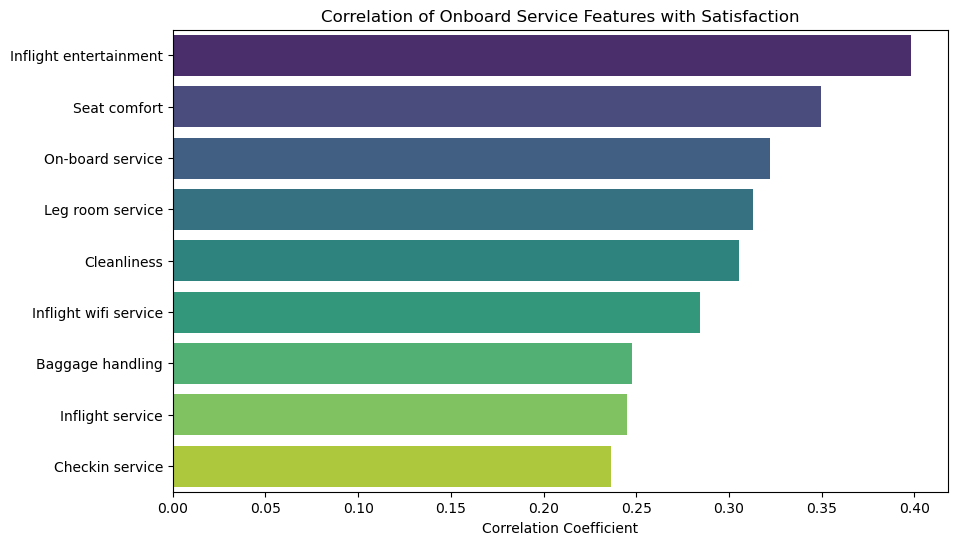

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Inflight wifi service', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Cleanliness',
    'Baggage handling', 'Checkin service', 'Inflight service'
]

corr_series = df[features + ['satisfaction_encoded']].corr()['satisfaction_encoded'].drop('satisfaction_encoded').sort_values(ascending=False)

print("Correlation of onboard service features with satisfaction:")
print(corr_series)

plt.figure(figsize=(10,6))
sns.barplot(x=corr_series.values, y=corr_series.index, palette='viridis')
plt.title('Correlation of Onboard Service Features with Satisfaction')
plt.xlabel('Correlation Coefficient')
plt.show()



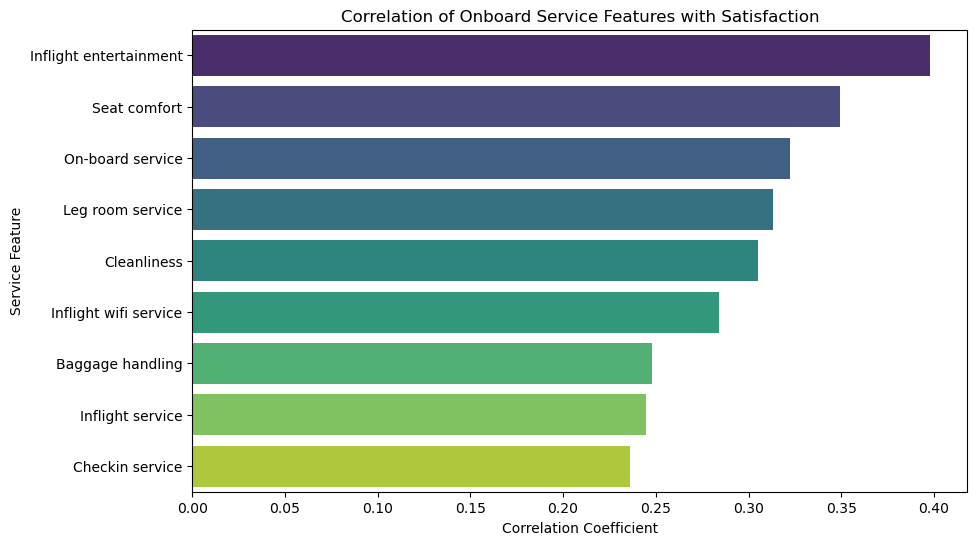

In [11]:
#7.Do longer flights (above the median distance) have higher or lower satisfaction rates compared to shorter flights?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_series.values, y=corr_series.index, palette='viridis')
plt.title('Correlation of Onboard Service Features with Satisfaction')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Service Feature')
plt.show()


Correlation of onboard service features with Satisfaction:
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
Inflight wifi service     0.284245
Baggage handling          0.247749
Inflight service          0.244741
Checkin service           0.236174
dtype: float64


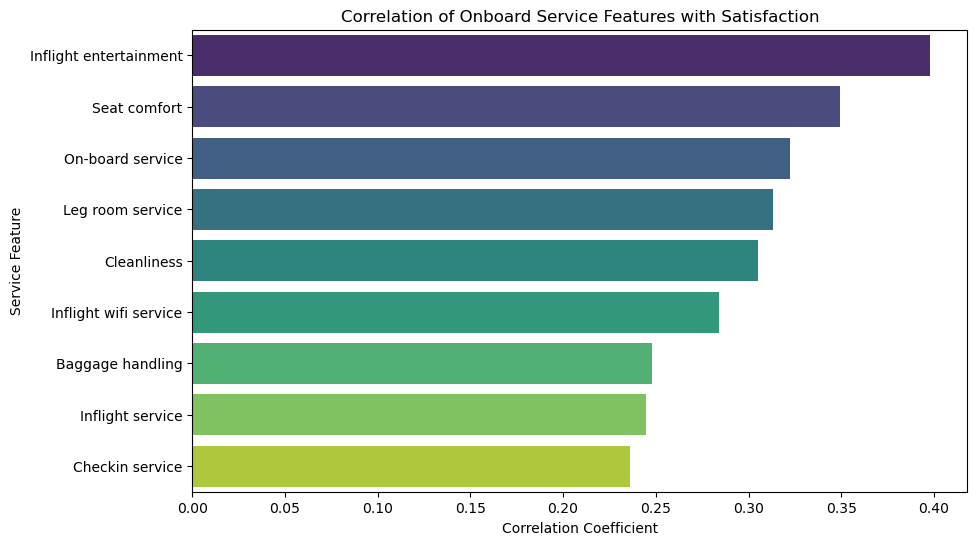

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update the file path accordingly)
df = pd.read_csv(r"C:\Users\HP\Desktop\PGDA43\03. Python\raw_data.csv")

# Map satisfaction to numeric if not already done
if 'satisfaction_encoded' not in df.columns:
    df['satisfaction_encoded'] = df['satisfaction'].map({
        'satisfied': 1,
        'neutral or dissatisfied': 0
    })

df['satisfaction_encoded'] = pd.to_numeric(df['satisfaction_encoded'], errors='coerce')

# List of onboard service features
onboard_service_features = [
    'Inflight wifi service',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness',
    'Baggage handling',
    'Checkin service',
    'Inflight service'
]

# Convert service columns to numeric
for col in onboard_service_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate correlations
correlations = {feature: df[feature].corr(df['satisfaction_encoded'])
                for feature in onboard_service_features}

corr_series = pd.Series(correlations).sort_values(ascending=False)

print("Correlation of onboard service features with Satisfaction:")
print(corr_series)

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_series.values, y=corr_series.index, palette='viridis')
plt.title('Correlation of Onboard Service Features with Satisfaction')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Service Feature')
plt.show()


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'satisfaction_encoded'],
      dtype='object')

Satisfaction rates by flight length category:
 Flight Length Category
Short    0.433333
Name: satisfaction_encoded, dtype: float64


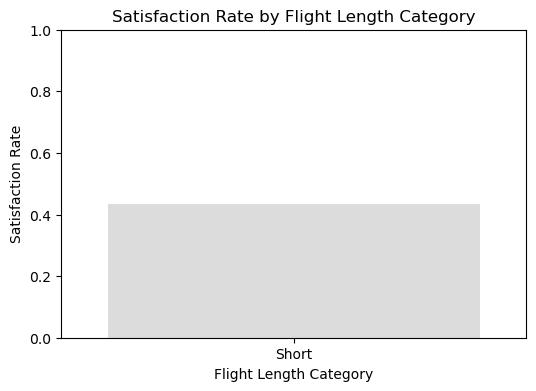

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)

if 'satisfaction_encoded' not in df.columns:
    df['satisfaction_encoded'] = df['satisfaction'].map({
        'satisfied': 1,
        'neutral or dissatisfied': 0
    })

df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')

median_distance = df['Flight Distance'].median()

df['Flight Length Category'] = df['Flight Distance'].apply(
    lambda x: 'Long' if x > median_distance else 'Short'
)

satisfaction_by_length = df.groupby('Flight Length Category')['satisfaction_encoded'].mean()

print("\nSatisfaction rates by flight length category:\n", satisfaction_by_length)

plt.figure(figsize=(6,4))
sns.barplot(x=satisfaction_by_length.index, y=satisfaction_by_length.values, palette='coolwarm')
plt.title('Satisfaction Rate by Flight Length Category')
plt.ylabel('Satisfaction Rate')
plt.xlabel('Flight Length Category')
plt.ylim(0,1)
plt.show()


In [14]:
import pandas as pd


df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')

# Sort by Flight Distance in descending order and get top 5
top5_longest_flights = df.sort_values(by='Flight Distance', ascending=False).head(5)

print("Top 5 longest flights:")
print(top5_longest_flights[['Flight Distance', 'satisfaction']])


Top 5 longest flights:
       Flight Distance             satisfaction
0                  632  neutral or dissatisfied
69266              632                satisfied
69276              632                satisfied
69275              632  neutral or dissatisfied
69274              632  neutral or dissatisfied


Top 5 longest flights:
       Flight Distance             satisfaction
0                  632  neutral or dissatisfied
69266              632                satisfied
69276              632                satisfied
69275              632  neutral or dissatisfied
69274              632  neutral or dissatisfied


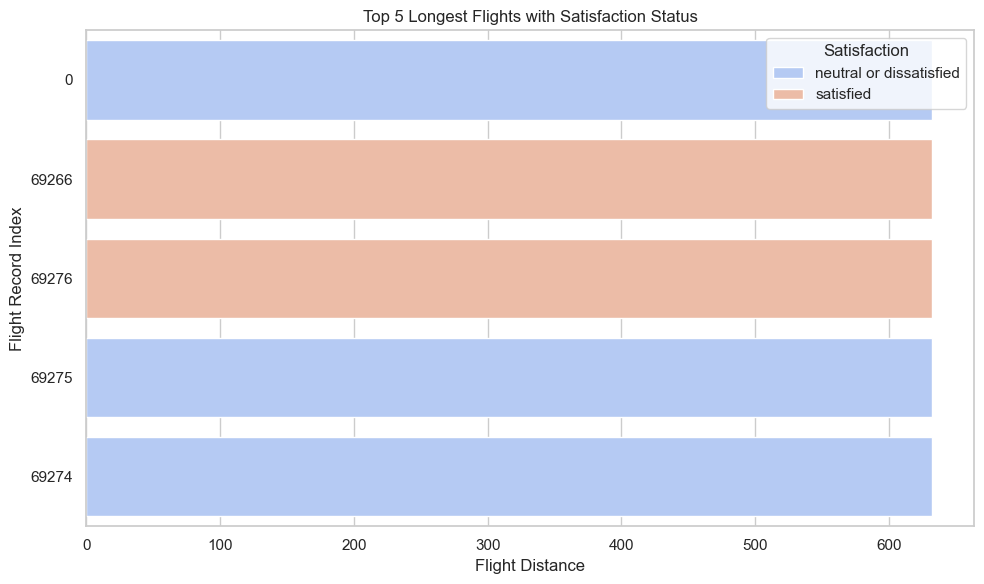

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')

top5_longest_flights = df.sort_values(by='Flight Distance', ascending=False).head(5)

print("Top 5 longest flights:")
print(top5_longest_flights[['Flight Distance', 'satisfaction']])

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
barplot = sns.barplot(
    x='Flight Distance',
    y=top5_longest_flights.index.astype(str),  # Using index as y-axis labels
    hue='satisfaction',
    data=top5_longest_flights,
    dodge=False,  # Bars are grouped by satisfaction
    palette='coolwarm'
)

plt.title('Top 5 Longest Flights with Satisfaction Status')
plt.xlabel('Flight Distance')
plt.ylabel('Flight Record Index')

plt.legend(title='Satisfaction', loc='upper right')

plt.tight_layout()
plt.show()


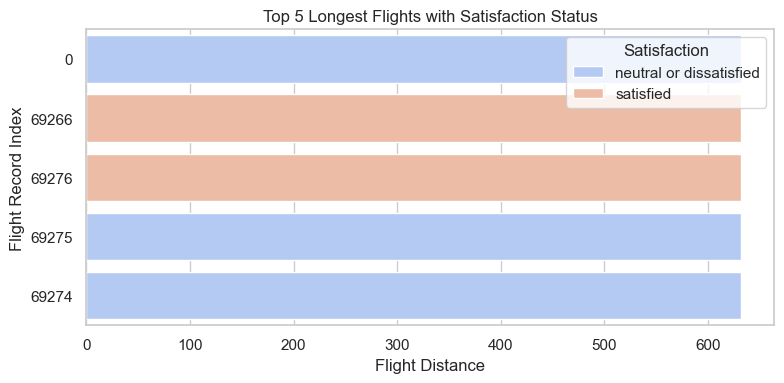

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top5 = df.assign(**{'Flight Distance': pd.to_numeric(df['Flight Distance'], errors='coerce')})\
         .sort_values('Flight Distance', ascending=False).head(5)

plt.figure(figsize=(8,4))
sns.barplot(data=top5, x='Flight Distance', y=top5.index.astype(str), hue='satisfaction', dodge=False, palette='coolwarm')
plt.title('Top 5 Longest Flights with Satisfaction Status')
plt.xlabel('Flight Distance')
plt.ylabel('Flight Record Index')
plt.legend(title='Satisfaction', loc='upper right')
plt.tight_layout()
plt.show()



Satisfaction rates by flight length category:
 Flight Length Category
Short    0.433333
Name: satisfaction_encoded, dtype: float64


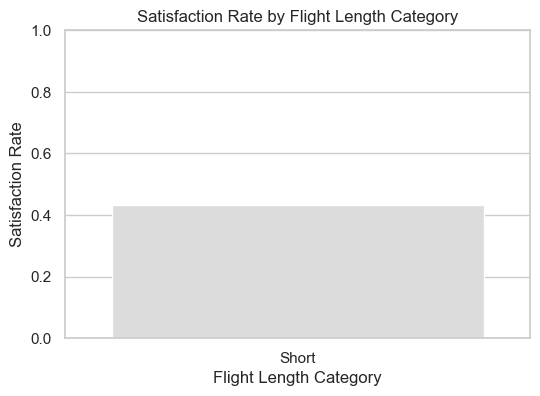

In [19]:

if 'satisfaction_encoded' not in df.columns:
    df['satisfaction_encoded'] = df['satisfaction'].map({
        'satisfied': 1,
        'neutral or dissatisfied': 0
    })

df['satisfaction_encoded'] = pd.to_numeric(df['satisfaction_encoded'], errors='coerce')

median_distance = df['Flight Distance'].median()

df['Flight Length Category'] = df['Flight Distance'].apply(
    lambda x: 'Long' if x > median_distance else 'Short'
)

satisfaction_by_length = df.groupby('Flight Length Category')['satisfaction_encoded'].mean()

print("\nSatisfaction rates by flight length category:\n", satisfaction_by_length)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=satisfaction_by_length.index, y=satisfaction_by_length.values, palette='coolwarm')
plt.title('Satisfaction Rate by Flight Length Category')
plt.ylabel('Satisfaction Rate')
plt.xlabel('Flight Length Category')
plt.ylim(0, 1)
plt.show()


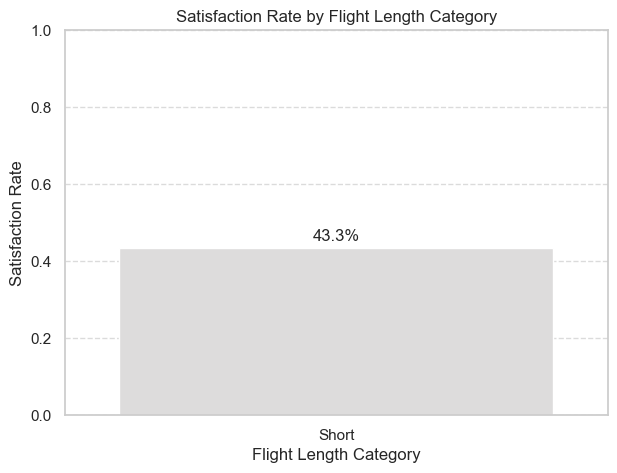

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Flight Distance' is numeric
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')

# Encode satisfaction to numeric if not already done
if 'satisfaction_encoded' not in df.columns:
    df['satisfaction_encoded'] = df['satisfaction'].map({
        'satisfied': 1,
        'neutral or dissatisfied': 0
    })

# Calculate median flight distance
median_distance = df['Flight Distance'].median()

# Categorize flights as 'Long' (> median) or 'Short' (<= median)
df['Flight Length Category'] = df['Flight Distance'].apply(lambda x: 'Long' if x > median_distance else 'Short')

# Calculate average satisfaction rate per length category
satisfaction_by_length = df.groupby('Flight Length Category')['satisfaction_encoded'].mean().reset_index()

# Plot side-by-side bars for Short vs Long flights satisfaction
plt.figure(figsize=(7, 5))
sns.barplot(data=satisfaction_by_length, x='Flight Length Category', y='satisfaction_encoded', palette='coolwarm')

plt.title('Satisfaction Rate by Flight Length Category')
plt.xlabel('Flight Length Category')
plt.ylabel('Satisfaction Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the satisfaction percentage
for i, row in satisfaction_by_length.iterrows():
    plt.text(i, row['satisfaction_encoded'] + 0.02, f"{row['satisfaction_encoded']*100:.1f}%", ha='center', fontsize=12)

plt.show()


Satisfaction rates by flight length category:
  Flight Length Category  satisfaction_encoded
0                  Short              0.433333


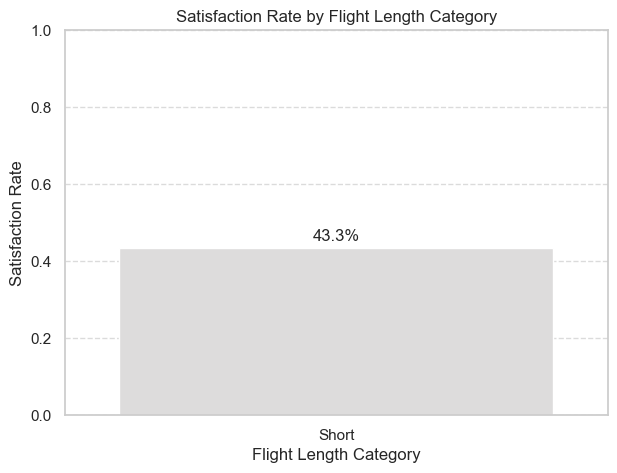

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(r"C:\Users\HP\Desktop\PGDA43\03. Python\raw_data.csv")

# Encode satisfaction to numeric if not already done
if 'satisfaction_encoded' not in df.columns:
    df['satisfaction_encoded'] = df['satisfaction'].map({
        'satisfied': 1,
        'neutral or dissatisfied': 0
    })

# Ensure Flight Distance is numeric
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')

# Drop rows with missing flight distance or satisfaction encoding (optional but recommended)
df = df.dropna(subset=['Flight Distance', 'satisfaction_encoded'])

# Calculate median flight distance
median_distance = df['Flight Distance'].median()

# Create flight length category: 'Long' if above median, else 'Short'
df['Flight Length Category'] = df['Flight Distance'].apply(lambda x: 'Long' if x > median_distance else 'Short')

# Calculate satisfaction rates for each flight length category
satisfaction_rates = df.groupby('Flight Length Category')['satisfaction_encoded'].mean().reset_index()

print("Satisfaction rates by flight length category:")
print(satisfaction_rates)

# Plotting the satisfaction rates for both categories
plt.figure(figsize=(7,5))
sns.barplot(x='Flight Length Category', y='satisfaction_encoded', data=satisfaction_rates, palette='coolwarm')

plt.title('Satisfaction Rate by Flight Length Category')
plt.xlabel('Flight Length Category')
plt.ylabel('Satisfaction Rate')
plt.ylim(0, 1)  # Satisfaction rate is between 0 and 1

# Annotate bars with percentages
for index, row in satisfaction_rates.iterrows():
    plt.text(index, row['satisfaction_encoded'] + 0.02, f"{row['satisfaction_encoded']*100:.1f}%", 
             ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
